In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Data Normalization


In [29]:
dataPrimary = pd.read_csv(
    "/home/amandeep/Documents/DataAnalysis/dataset/archive/winequality.csv"
)

In [30]:
dataPrimary.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
dataPrimary.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

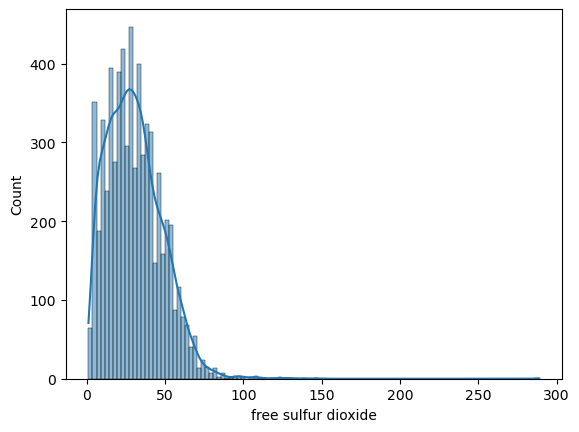

In [32]:
sns.histplot(dataPrimary["free sulfur dioxide"], kde=True)

In [33]:
TempData = dataPrimary.copy()

In [34]:
dic = {
    "House": [1, 2, 3, 4],
    "SqFoot": [1200, 1500, 1000, 1800],
    "Bedrooms": [3, 4, 2, 5],
    "Price": [50, 60, 40, 80],
}

In [35]:
data = pd.DataFrame(dic)
data

,House,SqFoot,Bedrooms,Price
0,1,1200,3,50
1,2,1500,4,60
2,3,1000,2,40
3,4,1800,5,80


# Min - Max Scaling


In [36]:
data["SqFootScaled"] = (data["SqFoot"] - data["SqFoot"].min()) / (
    data["SqFoot"].max() - data["SqFoot"].min()
)

In [37]:
data

,House,SqFoot,Bedrooms,Price,SqFootScaled
0,1,1200,3,50,0.250
1,2,1500,4,60,0.625
2,3,1000,2,40,0.000
3,4,1800,5,80,1.000


In [38]:
dataPrimary["free sulfur dioxide"].describe()

count    6497.000000
mean       30.525319
std        17.749400
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

In [39]:
Temp = dataPrimary["free sulfur dioxide"]
dataPrimary["free sulfur dioxide Scaled"] = (Temp - Temp.min()) / (
    Temp.max() - Temp.min()
)

In [40]:
dataPrimary[["free sulfur dioxide Scaled", "free sulfur dioxide"]]

,free sulfur dioxide Scaled,free sulfur dioxide
0,0.152778,45.0
1,0.045139,14.0
2,0.100694,30.0
3,0.159722,47.0
4,0.159722,47.0
...,...,...
6492,0.107639,32.0
6493,0.131944,39.0
6494,0.097222,29.0
6495,0.107639,32.0


<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

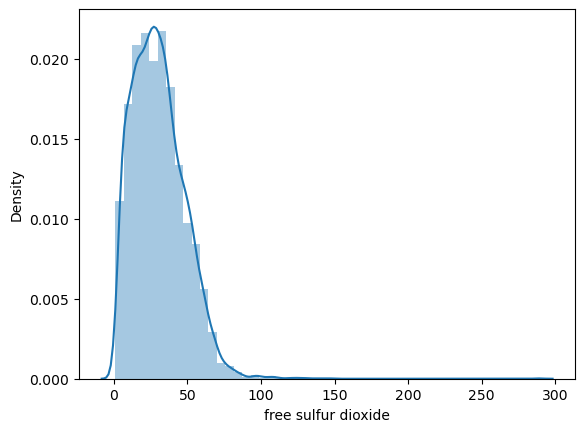

In [41]:
sns.distplot(dataPrimary["free sulfur dioxide"])

<Axes: xlabel='free sulfur dioxide Scaled', ylabel='Density'>

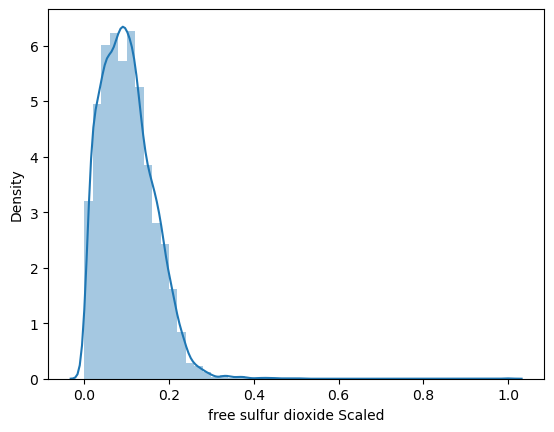

In [42]:
sns.distplot(dataPrimary["free sulfur dioxide Scaled"])

### Max Absolute Scaling


In [43]:
dataPrimary["free sulfur dioxide temp"] = (dataPrimary["free sulfur dioxide"]) / (
    dataPrimary["free sulfur dioxide"].abs().max()
)

Text(0.5, 1.0, 'free sulfer with max abs scaling')

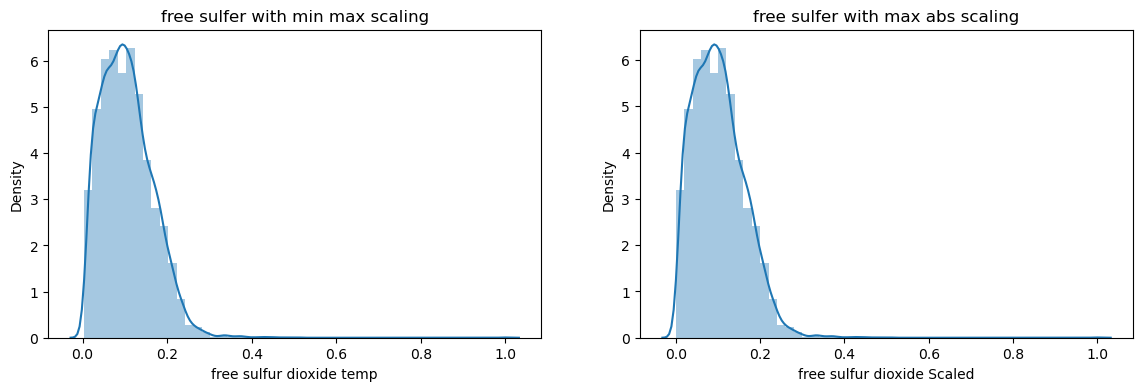

In [44]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.distplot(dataPrimary["free sulfur dioxide temp"])
plt.title("free sulfer with min max scaling")

plt.subplot(1, 2, 2)
sns.distplot(dataPrimary["free sulfur dioxide Scaled"])
plt.title("free sulfer with max abs scaling")

In [45]:
dataPrimary.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'free sulfur dioxide Scaled', 'free sulfur dioxide temp'],
      dtype='object')

<Axes: xlabel='alcohol', ylabel='Density'>

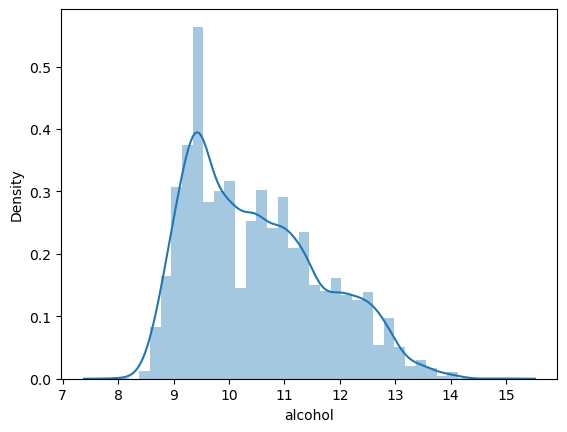

In [46]:
sns.distplot(dataPrimary.alcohol)

<Axes: xlabel='alcohol', ylabel='Density'>

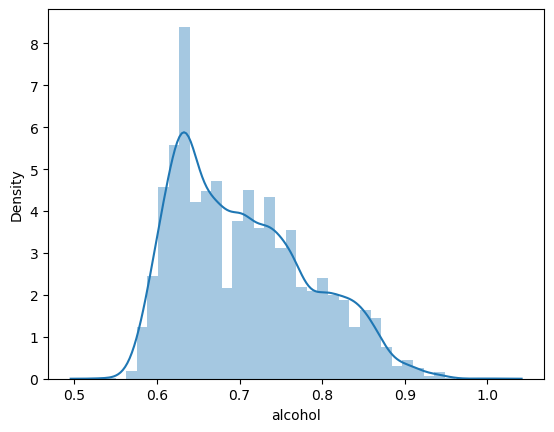

In [47]:
sns.distplot((dataPrimary["alcohol"] / (dataPrimary["alcohol"].abs().max())))

### Min max scaling

<Axes: xlabel='alcohol temp', ylabel='Density'>

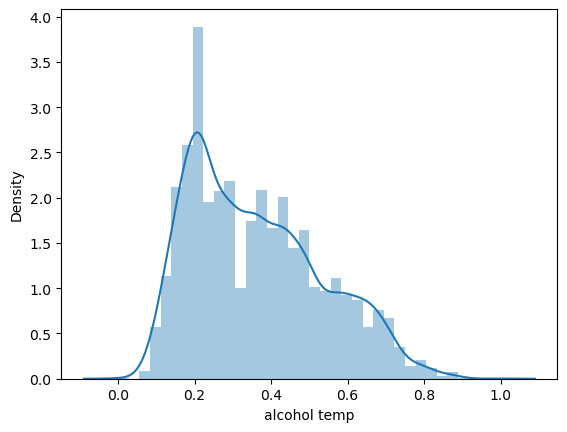

In [49]:
varTemp = dataPrimary['alcohol']
dataPrimary['alcohol temp'] = (varTemp - varTemp.min()) / (varTemp.max() - varTemp.min())
sns.distplot(dataPrimary['alcohol temp']) 